This notebook provides statistical tools to evaluate the models quantitatively.

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
import os
import sys
import inspect
from pathlib import Path
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = Path(currentdir).parents[1]
sys.path.insert(1, os.path.join(parentdir, 'train'))

In [5]:
import run
import runner
import importlib
importlib.reload(run)
importlib.reload(runner)

<module 'runner' from '/Users/vesko/GitHub/UoE-dissertation/model/train/runner.py'>

### Load Features

In [18]:
with open("features.txt") as f:
    features = f.read().splitlines()

### Infer & Catch Alignments

In [19]:
predictions, alignments = run.main('config.yml')

INFO:tensorflow:Using config: {'_model_dir': 'run_dir/model', '_tf_random_seed': None, '_save_summary_steps': 477, '_save_checkpoints_steps': 238, '_save_checkpoints_secs': None, '_session_config': gpu_options {
  per_process_gpu_memory_fraction: 0.8
  allow_growth: true
}
allow_soft_placement: true
, '_keep_checkpoint_max': 20, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 477, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1c329e5c50>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from run_dir/model/model.ckpt-10076
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:T

In [188]:
def plot_attention(activations, input_tags = None, output_tags = None):    
   
    features_len = activations.shape[1]
    labels_len = activations.shape[0]

    # Plot the attention map
    plt.clf()
    f = plt.figure(figsize=(20, 10))
    ax = f.add_subplot(1, 1, 1)

    # Add image
    i = ax.imshow(activations, interpolation='nearest', cmap='Blues')

    # Add colorbar
    cbaxes = f.add_axes([0.2, 0, 0.6, 0.03])
    cbar = f.colorbar(i, cax=cbaxes, orientation='horizontal')
    cbar.ax.set_xlabel('Alpha value (Probability output of the "softmax")', labelpad=2)

    # Add labels
    ax.set_yticks(range(labels_len))
    if output_tags != None:
        ax.set_yticklabels(output_tags[:labels_len])

    ax.set_xticks(range(features_len))
    if input_tags != None:
        ax.set_xticklabels(input_tags[:features_len], rotation=45)

    ax.set_xlabel('Input Sequence')
    ax.set_ylabel('Output Sequence')

    # add grid and legend
    ax.grid()

    # f.savefig(os.path.join('activation_viz.pdf'), bbox_inches='tight')
    plt.show()

In [195]:
def drop_event_type(drop_type, tags):
    """Drops a list of event type(s) from a list of tags.
    Both `event_type` and ` tags` must be lists."""
    
    new_tags = list()
    dropped_indices = list()
    for i, tag in enumerate(tags):
        if re.match(r'^ON[0-9]+$', tag):
            tag_type = "ON"
        elif re.match(r'^OFF[0-9]+$', tag):
            tag_type = "OFF"
        elif re.match(r'^SHIFT[0-9]+$', tag):
            tag_type = "SHIFT"
        
        if tag_type not in drop_type:
            new_tags.append(tag)
        else:
            dropped_indices.append(i)
    
    return dropped_indices, new_tags

In [196]:
i = 0
drop_type = ["OFF", "ON"] # a list of event types to exclude from the activations plot

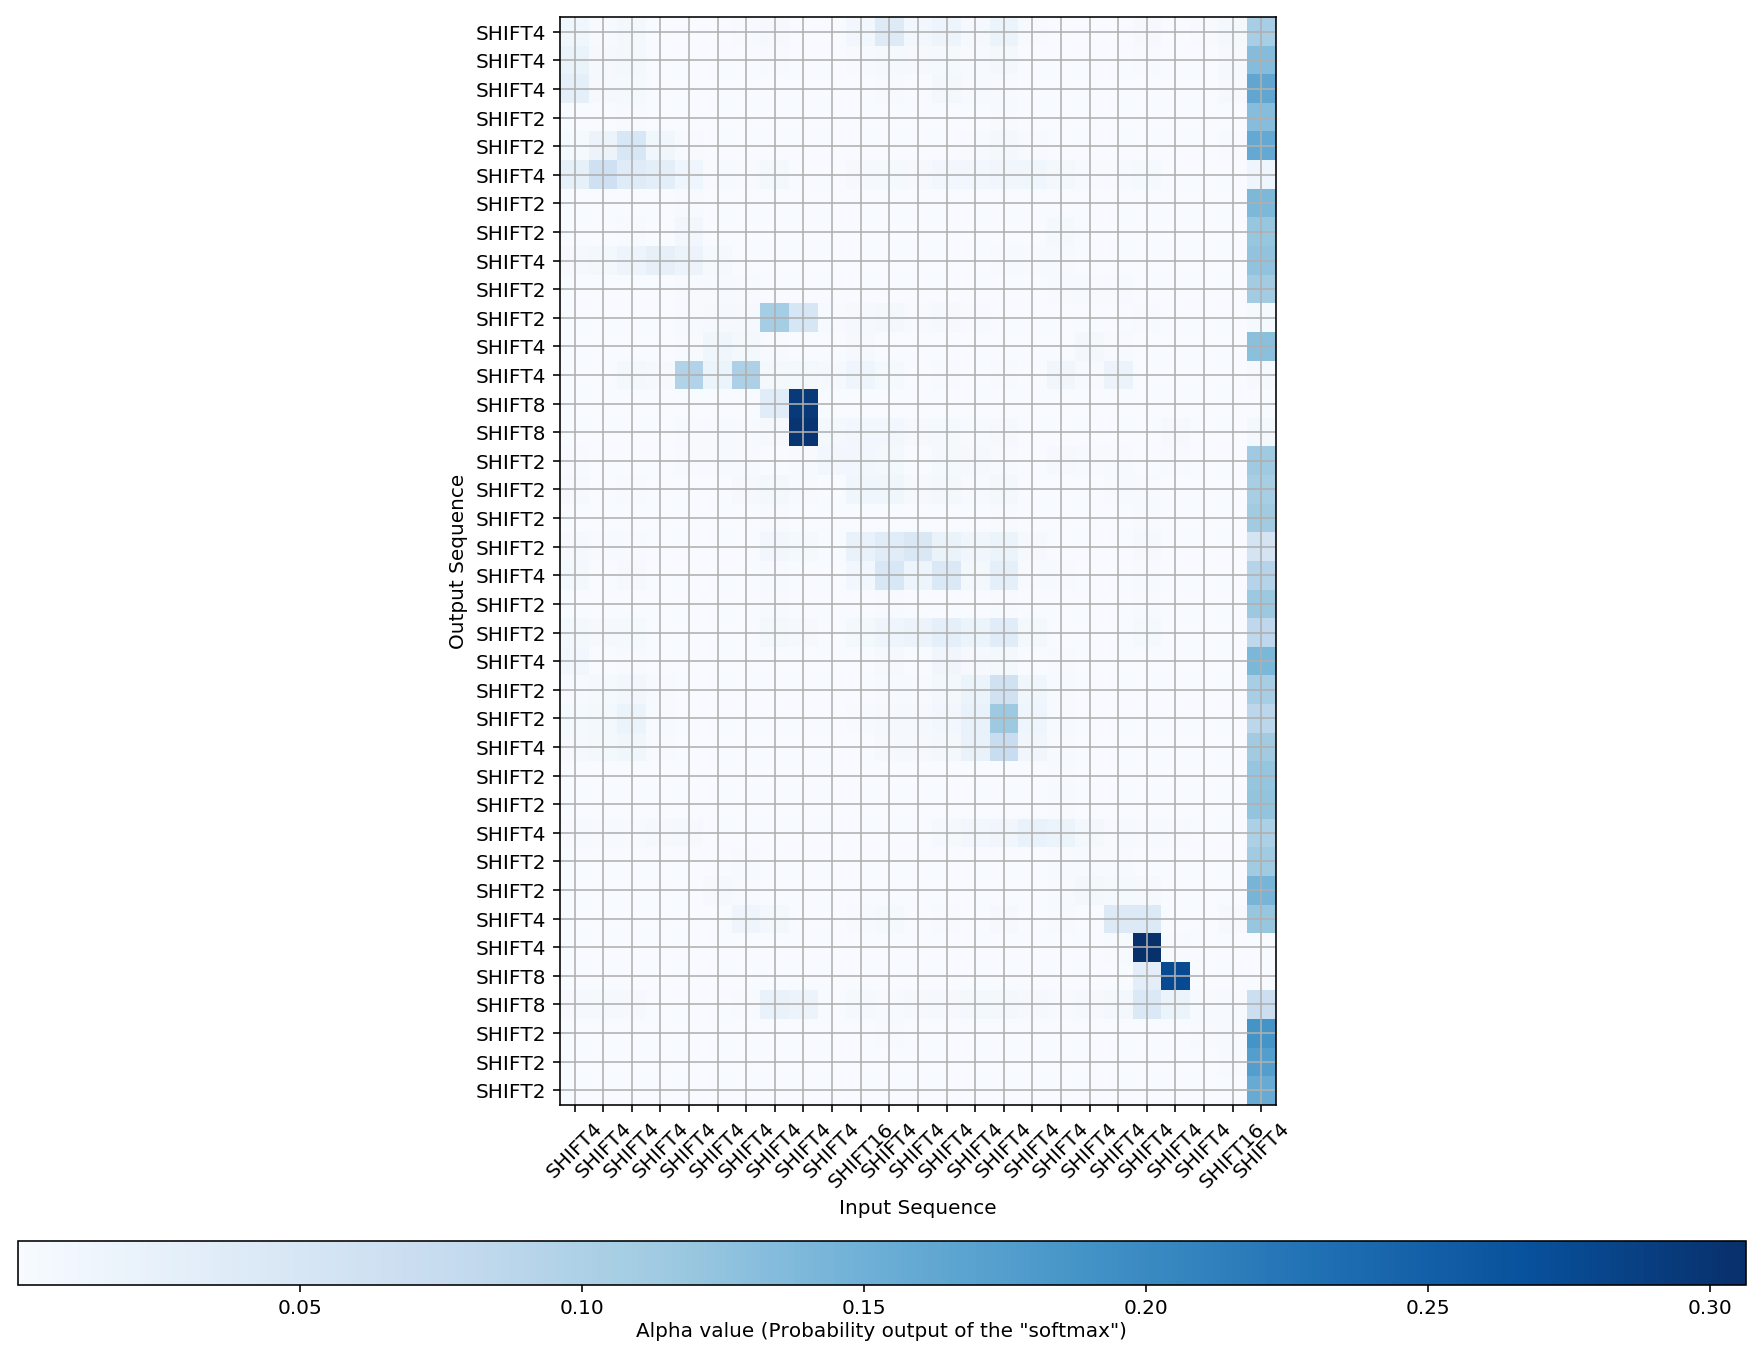

In [198]:
input_tags = features[i].split()
output_tags = predictions[i].split()

activations = alignments[i][0, :, :]

dropped_input_indices, input_tags = drop_event_type(drop_type, input_tags)
dropped_output_indices, output_tags = drop_event_type(drop_type, output_tags)

activations = np.delete(activations, dropped_input_indices, axis=1)
activations = np.delete(activations, dropped_output_indices, axis=0)

activations = activations[:len(output_tags), 0:len(input_tags)]

plot_attention(activations, input_tags, output_tags)

In [73]:
# features = "SHIFT16 ON70 SHIFT12 OFF70 ON67 SHIFT4 OFF67 ON63 SHIFT8 OFF63 SHIFT16 ON65 SHIFT4 OFF65 ON67 SHIFT4 OFF67 ON65 SHIFT4 OFF65 ON65 SHIFT4 OFF65 ON65 SHIFT8 OFF65 ON65 SHIFT4 OFF65 ON63 SHIFT4 OFF63 ON65 SHIFT4 OFF65 ON63 SHIFT4 OFF63 SHIFT4 ON70 SHIFT8 OFF70 ON70 SHIFT4 OFF70 ON70 SHIFT8 OFF70 SHIFT8 ON72 SHIFT8 OFF72 ON70 SHIFT8 OFF70 ON70 SHIFT8 OFF70 ON68 SHIFT4 OFF68 ON67 SHIFT4 OFF67 ON63 SHIFT8 OFF63 SHIFT12 ON63 SHIFT4 OFF63 ON65 SHIFT4 OFF65 ON67 SHIFT4 OFF67 ON65 SHIFT4 OFF65 ON70 SHIFT4 OFF70 SHIFT4 ON65 SHIFT4 OFF65 ON65 SHIFT4 OFF65 ON63 SHIFT8 OFF63 ON70 SHIFT4 OFF70 ON70 SHIFT16 OFF70 ON70 SHIFT16 OFF70".split()
# predicted_text = sentences[0].split()
# input_length = len(features)+1
# output_length = len(predicted_text)+1

In [8]:
# # import seaborn as sns
# plt.clf()
# f = plt.figure(figsize=(18, 10))
# ax = f.add_subplot(1, 1, 1)

# # add image
# i = ax.imshow(activation_map, interpolation='nearest', cmap='gray')

# # add colorbar
# cbaxes = f.add_axes([0.2, 0, 0.6, 0.03])
# cbar = f.colorbar(i, cax=cbaxes, orientation='horizontal')
# cbar.ax.set_xlabel('Probability', labelpad=2)

# # add labels
# ax.set_yticks(range(output_length))
# ax.set_yticklabels(predicted_text[:output_length])

# ax.set_xticks(range(input_length))
# # ax.set_xticklabels(text_[:input_length], rotation=45)

# ax.set_xlabel('Input Sequence')
# ax.set_ylabel('Output Sequence')

# # add grid and legend
# ax.grid()
# # ax.legend(loc='best')

# f.savefig(os.path.join('activation_viz.pdf'), bbox_inches='tight')
# f.show()